In [12]:
import cv2
import matplotlib.pyplot as plt
import fishts.transformers as t
import numpy as np
from fishts.descriptors.time_series import extract_ts_descriptor

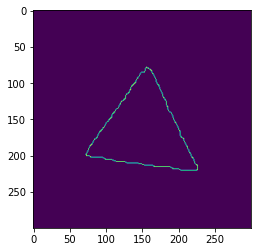

In [10]:
triangle_path = '../data/geometry/triangle/0.png'
triangle = cv2.imread(triangle_path)

transforms = t.Compose([
    t.ConvertColor(cv2.COLOR_BGR2GRAY),
    t.Resize(proportion_scale=True, g_measure=300),
    t.GaussianBlur(kernel_size=(5,5), sigma_x=0),
    t.Threshold(60, 255, cv2.THRESH_BINARY),
    t.CannyEdge(threshold_1=50, threshold_2=100),
    t.Dilate(kernel=None, iterations=1),
    t.Erode(kernel=None, iterations=1),
])

plt.imshow(transforms(triangle))

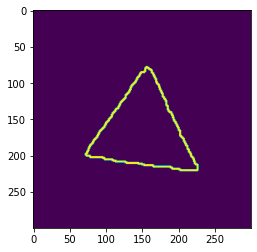

In [58]:
transformed = transforms(triangle)

contours, _ = cv2.findContours(transformed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

reference = np.zeros_like(transformed)
cv2.drawContours(reference, [contours[0]], 0, 255, 2)
cv2.imwrite('./example/0.png', reference)

plt.imshow(reference)

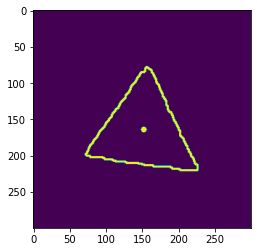

In [59]:
M = cv2.moments(reference)

centroid_x = int(M['m10']/M['m00'])
centroid_y = int(M['m01']/M['m00'])

ref2 = reference.copy()

cv2.circle(ref2, (centroid_x, centroid_y), radius=4, color=255, thickness=-1)
cv2.imwrite('./example/1.png', ref2)

plt.imshow(ref2)

In [62]:
id = 0 + 2

for i in np.arange(0, 360, 1):
    tmp = np.zeros_like(reference)

    thickness = 1

    radius = max(tmp.shape)
    theta = np.deg2rad(i)

    out_coord = (
        int(centroid_x + np.cos(theta) * radius),
        int(centroid_y - np.sin(theta) * radius)
    )

    # Handle diferent line gaps
    cv2.line(tmp, (centroid_x, centroid_y), out_coord, 255, thickness)

    ref3 = ref2.copy()
    
    ref4 = ref2.copy()
    cv2.line(ref4, (centroid_x, centroid_y), out_coord, 255, thickness)
    
    cv2.line(ref3, (centroid_x, centroid_y), out_coord, 255, thickness)
    cv2.imwrite(f'./example/{id}.png', ref3)
    id += 1
    
    (row, col) = np.nonzero(np.logical_and(tmp, reference))
    
    # if i == 0:
    ref4 = t.ConvertColor(cv2.COLOR_GRAY2BGR)(ref4)
    cv2.circle(ref4, (col[0], row[0]), radius=4, color=(0, 0, 255), thickness=-1)
    cv2.imwrite(f'./example/{id}.png', ref4)
    id += 1